In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

 set the size of the population and the sample that we want to generate

In [28]:
population_size = 500
sample_size = 20

The scale parameter is set to 1 for half of the population and 2 for the other half, so the population has a non-normal distribution then concatenates both the sample

In [25]:
# Generate a population with a non-normal distribution
population = np.concatenate((np.random.exponential(scale=1, size=population_size//2), np.random.exponential(scale=2, size=population_size//2)))

generates 500 samples from the population, each with a size of 20

In [26]:
# Generate multiple samples from the population and calculate the mean of each sample
sample_means = [np.mean(np.random.choice(population, sample_size)) for i in range(1000)]

To create overlay a normal distribution curve we need calculated np.mean and np.std then calculate np.linspace to generate 100 evenly spaced values between the mean minus 3 standard deviations and the mean plus 3 standard deviations.The y variable is created using norm.pdf from scipy.stats to generate the values of the normal distribution with the mean and standard deviation

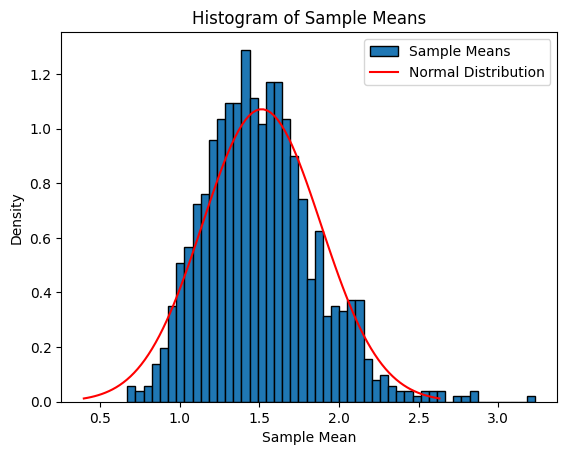

In [27]:
# Plot the histogram of sample means and overlay a normal distribution curve
mu = np.mean(population)
sigma = np.std(population) / np.sqrt(sample_size)
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
y = norm.pdf(x, mu, sigma)
plt.hist(sample_means, bins=50, edgecolor='black', density=True, label='Sample Means')
plt.plot(x, y, 'r', label='Normal Distribution')
plt.title("Histogram of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.legend()
plt.show()

As you can see, as the sample size increases, the distribution of the sample means approaches a normal distribution, as predicted by CLT.

In [6]:
import numpy as np

# Decision Tree  accuracy
dt_accuracy = np.array([93, 94, 89, 88, 78, 89, 76, 98])
dt_mean_accuracy = np.mean(dt_accuracy)

# Logistic Regression  accuracy
lr_accuracy = np.array([78, 90, 89, 76, 89])
lr_mean_accuracy = np.mean(lr_accuracy)

# Print the mean accuracy for each model
print("Mean Accuracy for Decision Tree:", dt_mean_accuracy)
print("Mean Accuracy for Logistic Regression:", lr_mean_accuracy)

Mean Accuracy for Decision Tree: 88.125
Mean Accuracy for Logistic Regression: 84.4


The two populations are independent, as they are the accuracy results of two different models (decision tree and logistic regression) obtained from separate sets of data, not related to each other.

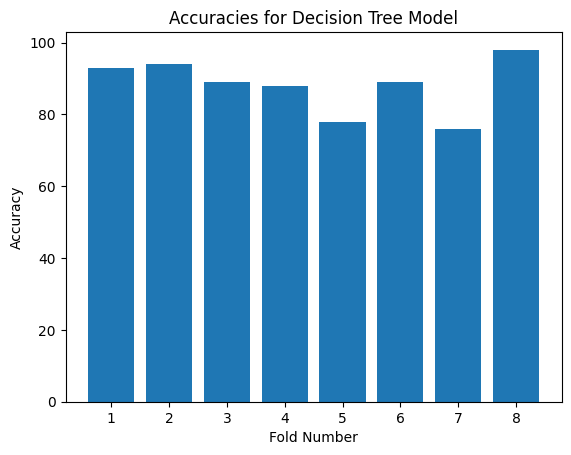

In [7]:
import matplotlib.pyplot as plt

accuracy_dTree = [93, 94, 89, 88, 78, 89, 76, 98]

plt.bar(range(1, 9), accuracy_dTree)
plt.title("Accuracies for Decision Tree Model")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.show()

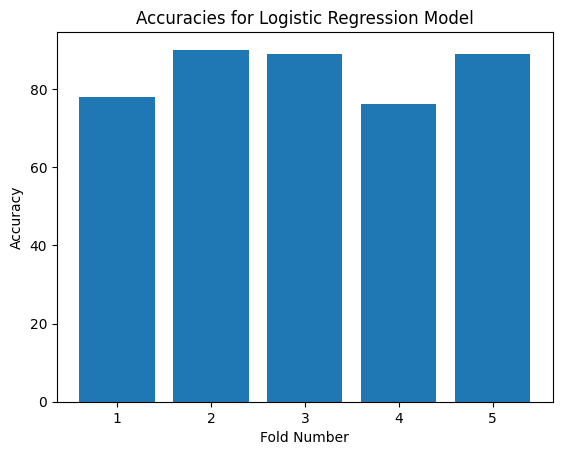

In [8]:
import matplotlib.pyplot as plt

accuracy_linearR = [78, 90, 89, 76, 89]

plt.bar(range(1, 6), accuracy_linearR)
plt.title("Accuracies for Logistic Regression Model")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.show()

In [9]:
import scipy.stats as stats

In [10]:
# calculate means
mean_dTree = np.mean(accuracy_dTree)
mean_linearR = np.mean(accuracy_linearR)

In [11]:
# calculate standard deviation
std_dTree = np.std(accuracy_dTree, ddof=1)
std_linearR = np.std(accuracy_linearR, ddof=1)

In [12]:
#  calculate degree the null hypothesis
degree_hy = len(accuracy_dTree) + len(accuracy_linearR) - 2


In [13]:
# calculate the t-statistic
t = (mean_dTree - mean_linearR) / np.sqrt(std_dTree**2/len(accuracy_dTree) + std_linearR**2/len(accuracy_linearR))

In [14]:
# calculate the p-value
p = stats.t.sf(np.abs(t), degree_hy) * 2

In [15]:
print("t-statistic: ", t)
print("p-value: ", p)

t-statistic:  0.9163203472079554
p-value:  0.3791497502435084


the p-value is 0.379, which is greater than 0.05 that means we fail to reject the null hypothesis that the mean accuracy of decision tree model and logistic regression model is the same. We cannot conclude that the mean accuracy of the two models is different.